In [51]:
import os
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from keras.models import Se

In [10]:
import glob
from  pathlib import Path

In [32]:
project_path = "C:\\Users\\shiva\\OneDrive\\Desktop\\Project_resume\\chest_xray"
train_dir = os.path.join(project_path,"train")
train_nor = os.path.join(project_path,"train","NORMAL")
val_dir = os.path.join(project_path,"val")
test_dir = os.path.join(project_path,"test")

In [29]:

for j in glob.glob(f"{project_path}\\*"):
    for i in glob.glob(f"{j}\\*"): 
        name = Path(j)
        p = name.stem
        k = Path(i)
        k = k.stem
        if p=="chest_xray":
            pass
        else:
           
            print(f"the value of {p} in {k} is {len(os.listdir(i))}")
    print("##############################")


##############################
##############################
the value of test in NORMAL is 234
the value of test in PNEUMONIA is 390
##############################
the value of train in NORMAL is 1341
the value of train in PNEUMONIA is 3875
##############################
the value of val in NORMAL is 8
the value of val in PNEUMONIA is 8
##############################
the value of __MACOSX in chest_xray is 6
##############################


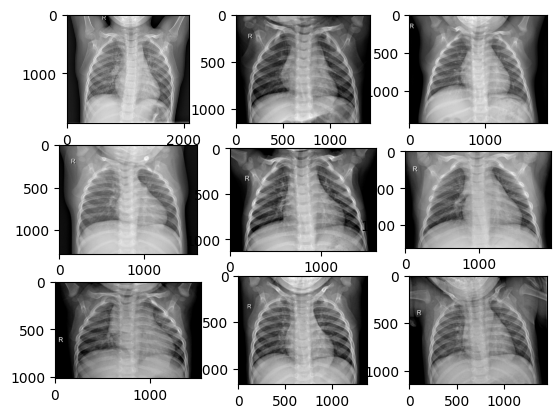

In [36]:
for i in range(9):
    plt.subplot(3,3,i+1)
    img = plt.imread(f"train\\NORMAL\\{os.listdir(train_nor)[i]}")
    plt.imshow(img, cmap='gray')
    

 Investigate a single image

In [44]:
img = plt.imread("train\\NORMAL\\IM-0115-0001.jpeg")
print(f"maximu value of pixel {img.max()}")
print(f"mean value of pixel {img.mean()}")
print(f"std of pixels {img.std()}")
print(f"shape of a image {img.shape}")


maximu value of pixel 255
mean value of pixel 128.90747832983968
std of pixels 62.30103035552067
shape of a image (1858, 2090)


c:\Users\shiva\miniconda3\envs\model_scratch\lib\site-packages\ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


<AxesSubplot:>

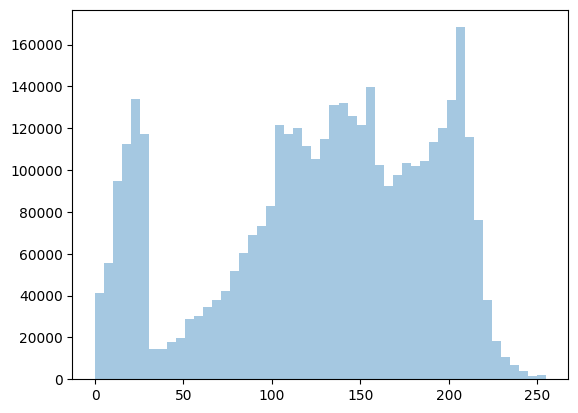

In [50]:
sns.distplot(img.ravel(),label=f"Pixel Mean {np.mean(img):.4f} & Standard Deviation {np.std(img):.4f}", 
             kde=False)

Image Preprocessing

In [54]:
image_genrator = ImageDataGenerator(rotation_range = 20,
width_shift_range = 0.1,
shear_range = 0.1,
zoom_range = 0.1,
samplewise_center = True,
samplewise_std_normalization=True
)

In [55]:
train = image_genrator.flow_from_directory(train_dir,batch_size=8,shuffle=True,
class_mode = "binary",
target_size = (320,320))

Found 5216 images belonging to 2 classes.


In [57]:
valid = image_genrator.flow_from_directory(val_dir, 
                                                batch_size=1, 
                                                shuffle=False, 
                                                class_mode='binary',
                                                target_size=(320, 320))

Found 16 images belonging to 2 classes.


In [59]:
print(train)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


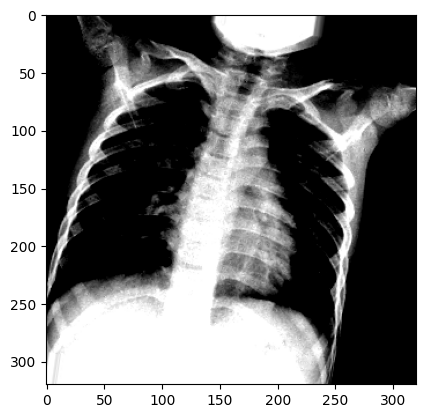

In [67]:
img,label = train.__getitem__(0)
plt.imshow(img[1],cmap="gray")

c:\Users\shiva\miniconda3\envs\model_scratch\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


-1.0212263e-07
1.0000002


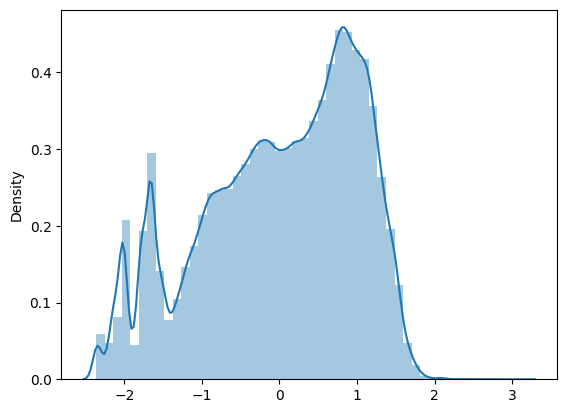

In [70]:
sns.distplot(img.ravel())
print(img.mean())
print(img.std())

In [71]:
num_normal

NameError: name 'num_normal' is not defined

In [72]:
nor = len(os.listdir("train\\NORMAL"))
print(nor)

1341


In [73]:
pne = len(os.listdir("train\\PNEUMONIA"))
print(pne)

3875


In [76]:
weight_for_0 = pne/(pne+nor)
weight_for_1 = nor/(pne+nor)
class_weight = {0: weight_for_0, 1: weight_for_1}
class_weight

{0: 0.7429064417177914, 1: 0.2570935582822086}

In [80]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (
    Dense, Conv2D, MaxPool2D, Dropout, Flatten, 
    BatchNormalization, GlobalAveragePooling2D
)

from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras import backend as K

from sklearn.metrics import confusion_matrix, classification_report

In [81]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(320, 320, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(320, 320, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [82]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 318, 318, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 318, 318, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 316, 316, 32)      9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 316, 316, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 158, 158, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 156, 156, 64)      18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 156, 156, 64)      2

In [83]:
r = model.fit(
    train, 
    epochs=10,
    validation_data=valid, 
    class_weight=class_weight,
    steps_per_epoch=10,
    validation_steps=25,
)

Epoch 1/10
10/10 [==============================] - 45s 5s/step - loss: 6.5639 - acc: 0.6250 - val_loss: 3.4922 - val_acc: 0.6400
Epoch 2/10
10/10 [==============================] - 52s 5s/step - loss: 2.0862 - acc: 0.7875 - val_loss: 5.4261 - val_acc: 0.4400
Epoch 3/10
10/10 [==============================] - 53s 5s/step - loss: 2.7973 - acc: 0.8000 - val_loss: 6.2695 - val_acc: 0.4800
Epoch 4/10
10/10 [==============================] - 52s 5s/step - loss: 1.3240 - acc: 0.7250 - val_loss: 17.1934 - val_acc: 0.3600
Epoch 5/10
10/10 [==============================] - 52s 5s/step - loss: 1.1052 - acc: 0.8250 - val_loss: 13.9043 - val_acc: 0.4400
Epoch 6/10
10/10 [==============================] - 54s 5s/step - loss: 0.5197 - acc: 0.9000 - val_loss: 19.7317 - val_acc: 0.3600
Epoch 7/10
10/10 [==============================] - 51s 5s/step - loss: 0.4413 - acc: 0.9250 - val_loss: 19.9921 - val_acc: 0.3600
Epoch 8/10
10/10 [==============================] - 57s 6s/step - loss: 0.6909 - acc: 

In [84]:
from tensorflow.keras.applications import mobilenet

In [93]:
base_model = mobilenet.MobileNet(include_top=False,input_shape=(320,320,3))
top_layers = base_model.output
top_layers = GlobalAveragePooling2D()(top_layers)
top_layers = Dense(512,activation='relu')(top_layers)
pred = Dense(1,activation='softmax')(top_layers)
model1 =Model(inputs = base_model.input,outputs= pred)
model1.summary()

c:\Users\shiva\miniconda3\envs\model_scratch\lib\site-packages\keras_applications\mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 320, 320, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 321, 321, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 160, 160, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 160, 160, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 160, 160, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 160, 160, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 160, 160, 32)      128 

In [94]:

model1.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [96]:
fiting = model1.fit(
    train, 
    epochs=10,
    validation_data=valid, 
    class_weight=class_weight,
    steps_per_epoch=10,
    validation_steps=25,
)

Epoch 1/10
10/10 [==============================] - 30s 3s/step - loss: 2.7054 - acc: 0.7625 - val_loss: 9.7595 - val_acc: 0.3600
Epoch 2/10
10/10 [==============================] - 36s 4s/step - loss: 2.9902 - acc: 0.7375 - val_loss: 9.7595 - val_acc: 0.3600
Epoch 3/10
10/10 [==============================] - 39s 4s/step - loss: 3.1326 - acc: 0.7250 - val_loss: 9.7595 - val_acc: 0.3600
Epoch 4/10
10/10 [==============================] - 40s 4s/step - loss: 2.4206 - acc: 0.7875 - val_loss: 9.7595 - val_acc: 0.3600
Epoch 5/10
10/10 [==============================] - 44s 4s/step - loss: 2.9902 - acc: 0.7375 - val_loss: 9.7595 - val_acc: 0.3600
Epoch 6/10
10/10 [==============================] - 48s 5s/step - loss: 3.4173 - acc: 0.7000 - val_loss: 9.7595 - val_acc: 0.3600
Epoch 7/10
10/10 [==============================] - 50s 5s/step - loss: 3.4173 - acc: 0.7000 - val_loss: 9.7595 - val_acc: 0.3600
Epoch 8/10
10/10 [==============================] - 61s 6s/step - loss: 2.5630 - acc: 0.77

In [103]:
test = image_genrator.flow_from_directory(test_dir, 
                                            batch_size=1, 
                                            shuffle=False, 
                                            class_mode='binary',
                                            target_size=(320, 320))

Found 624 images belonging to 2 classes.


In [105]:
pred = model.predict(test)

# print(confusion_matrix(test.classes, pred > 0.5))
# pd.DataFrame(classification_report(test.classes, pred > 0.5, output_dict=True))

In [106]:
print(pred)

[[0.34833115 0.6516688 ]
 [0.17400566 0.8259944 ]
 [0.45650154 0.54349846]
 ...
 [0.45707163 0.54292834]
 [0.56407124 0.43592873]
 [0.4863111  0.5136889 ]]


In [107]:
model1.evaluate(test)

624/624 [==============================] - 56s 90ms/step - loss: 5.7185 - acc: 0.6250


[5.718464255332947, 0.625]

In [108]:
predicted_vals = model.predict(test, steps=len(test))

In [109]:
print(predicted_vals)

[[0.36960995 0.63039005]
 [0.21955149 0.7804485 ]
 [0.3772949  0.62270516]
 ...
 [0.6728225  0.3271775 ]
 [0.65650785 0.34349212]
 [0.5443713  0.45562875]]


In [102]:
from tensorflow.keras.preprocessing import image

def prepare_img(file):
    img1=image.load_img(file,target_size=(320,320))
    img2=image.img_to_array(img1)
    img3=np.expand_dims(img2,axis=0)
    return img3

img = prepare_img("test\\PNEUMONIA\\person1_virus_6.jpeg")
model1.predict(img)

array([[1.]], dtype=float32)

In [112]:
print(confusion_matrix(test.classes, predicted_vals))

ValueError: Classification metrics can't handle a mix of binary and continuous-multioutput targets

In [111]:
test.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}